overweriting


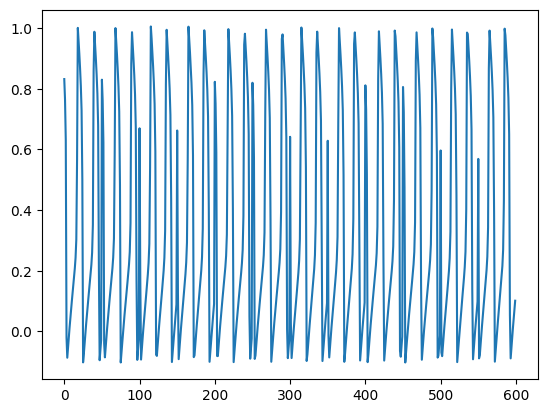

(12, 50)


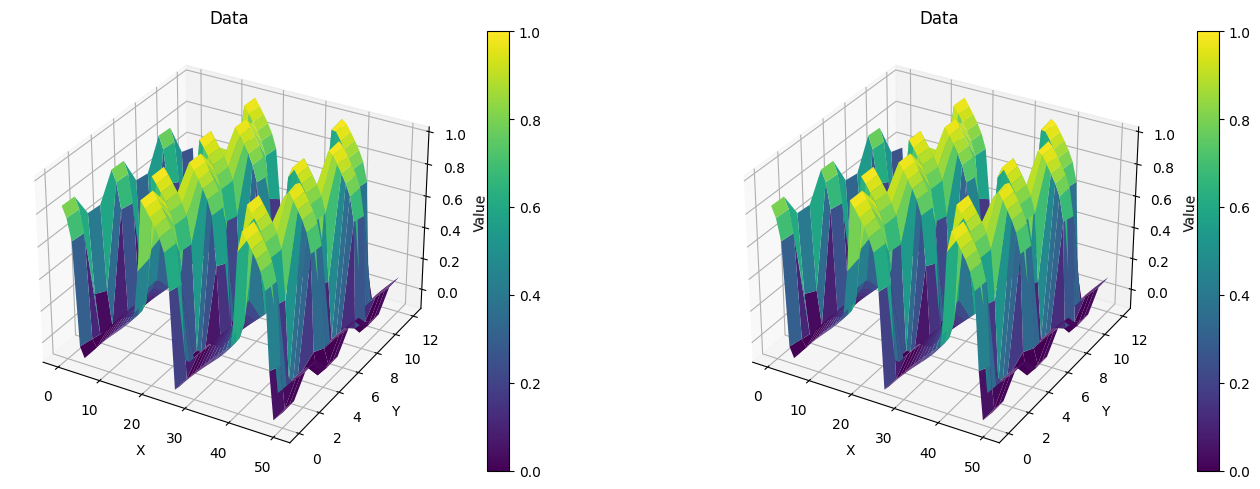

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t_w=100
import os

nc=12

def plota(data,T):
    print(np.shape(data))
    # Create a meshgrid for X and Y values
    x = np.linspace(0, 50, np.shape(data)[1])
    y = np.linspace(0, 12, np.shape(data)[0])
    X, Y = np.meshgrid(x, y)

    # Create a figure and 3D Axes objects for subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': '3d'})

    # Plot the surface color plots on each subplot
    surfs = []
    data_arrays = [data, data]
    plot_titles = ['Data', 'Data']
    mi,ma=0,1
    #print(data)
    for i, ax in enumerate(axs):
        if(i==2):
            ax.set_zlim(0,0.1) 
            mi,ma=0,0.1
        
        surf = ax.plot_surface(X, Y, data, cmap='viridis',vmin=mi,vmax=ma)
        surfs.append(surf)
        ax.set_title(plot_titles[i])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Value')
        fig.colorbar(surf, ax=ax)
        if(i==2):
            ax.set_zlim(0,0.6) 
    # Show the multi-plot
    plt.tight_layout()
    plt.show()

def generateExactSolution(t,dt,x0,w0,rate,P,begin,end):
    
    
    n2=int(t/(dt))+2
    n = int((end-begin)/(dt*rate))
    Sol=np.zeros((n,3))
  
    Sol2=np.zeros((n2,2))
    Sol2[0]=x0,w0
    T=0
    k=0
    while(k<n2-1):
        x,w=Sol2[k]
        Sol2[k+1]=10*(x*(x-0.4)*(1-x)-w + P)*dt+  x, 0.2*(x*0.2-0.8*w)*dt +w
 
        if ((k*dt==begin or ((k+1)%rate == 0 and k*dt>=begin and k*dt<=end))and T<n):
          
           
            Sol[T] = Sol2[k][0],Sol2[k][1] , k*dt
            T=T+1
        
        k=k+1
        if(k*dt > end):
            break
    return Sol

def getConstraintFromData(w_i=1, data_folder="./extrapol/"):
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    V = np.empty(0)
    U = np.empty(0)
    krange = [(0.08 + 0.1 * i * 0.02) for i in range(0,2)]
    vrange = [(0 + 0.05 * i * 0.12) for i in range(0, 2)]
    urange = [(0 + 0.1 * i * 1) for i in range(0, 3)]

    deltaT = 0.01
    rate =100
    
    for UR in urange:
        for KR in krange:
            for VR in vrange:
                sol = generateExactSolution(t_w, deltaT, UR, VR, rate, KR, 50, 100)

                T = np.append(T, sol.T[2] )
                K = np.append(K, np.full_like(sol.T[2], KR))
                U = np.append(U, np.full_like(sol.T[2], UR))
                V = np.append(V, np.full_like(sol.T[2], VR))
                SOLs = np.append(SOLs, sol.T[0])
                SOLw = np.append(SOLw, sol.T[1])

    #print(SOLs)
    plt.plot(SOLs)
    plt.show()
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)
    
    pred_u= np.reshape(SOLs, (nc,len(V)//nc))
    true_u= np.reshape(SOLs, (nc,len(V)//nc))
    plota(pred_u,T)
getConstraintFromData()


overweriting


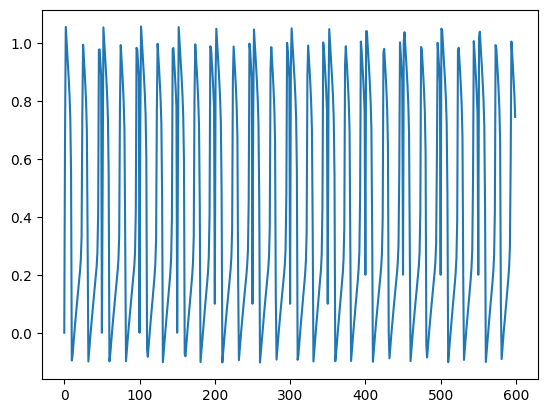

(12, 50)


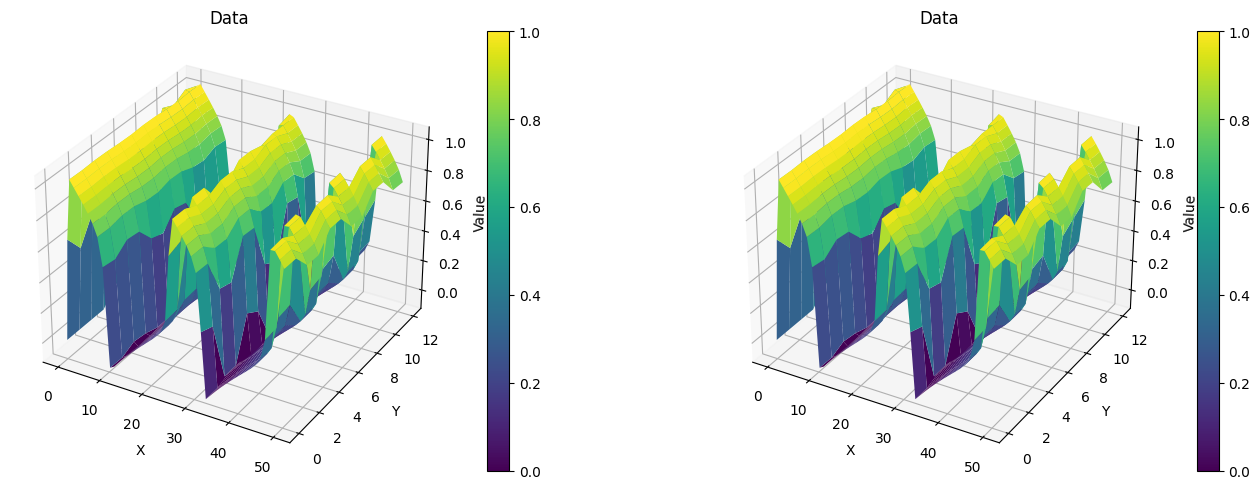

In [2]:
def getConstraintFromData(w_i=1, data_folder="./interpol/"):
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    V = np.empty(0)
    U = np.empty(0)
    krange = [(0.08 + 0.1 * i * 0.02) for i in range(0,2)]
    vrange = [(0 + 0.05 * i * 0.12) for i in range(0, 2)]
    urange = [(0 + 0.1 * i * 1) for i in range(0, 3)]

    deltaT = 0.01
    rate =100
    
    for UR in urange:
        for KR in krange:
            for VR in vrange:
                sol = generateExactSolution(t_w, deltaT, UR, VR, rate, KR, 0, 50)

                T = np.append(T, sol.T[2] - 0)
                K = np.append(K, np.full_like(sol.T[2], KR))
                U = np.append(U, np.full_like(sol.T[2], UR))
                V = np.append(V, np.full_like(sol.T[2], VR))
                SOLs = np.append(SOLs, sol.T[0])
                SOLw = np.append(SOLw, sol.T[1])

    #print(SOLs)
    plt.plot(SOLs)
    plt.show()
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)
    nc=2*2*3
    pred_u= np.reshape(SOLs, (nc,len(V)//nc))
    true_u= np.reshape(SOLs, (nc,len(V)//nc))
    plota(pred_u,T)
getConstraintFromData()


overweriting
[ 0.005       0.24534371  0.59565799 ... -0.02816658 -0.00778019
  0.01275732]


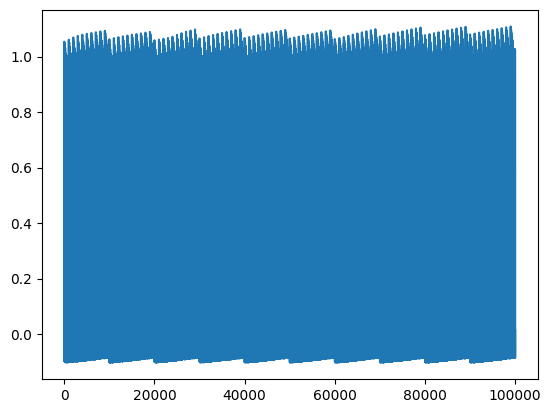

(1000, 100)


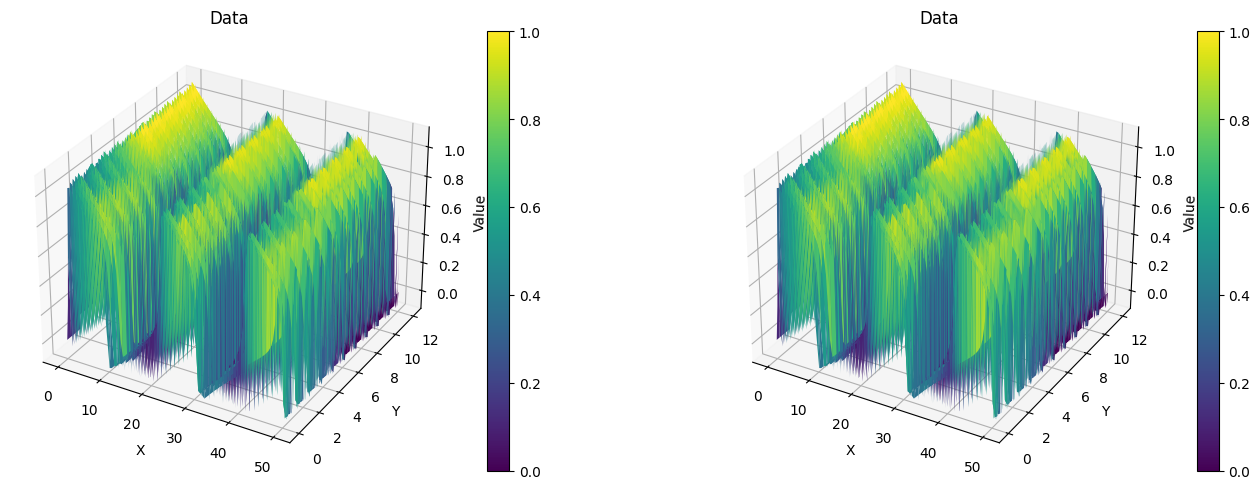

In [3]:
def getConstraintFromData(w_i=1, data_folder="./validation/"):
    t_w=50
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    V = np.empty(0)
    U = np.empty(0)
    krange = [(0.08 + 0.03 * i * 0.1) for i in range(0, 10)]
    vrange = [(0.004 + 0.1 * i * 0.12) for i in range(0, 10)]
    urange = [(0.005 + 0.1 * i * 1) for i in range(0, 10)]


    deltaT = 0.01
    rate = 50
    i=0
    for UR in urange:
        for KR in krange:
            for VR in vrange:
                sol = generateExactSolution(t_w, deltaT, UR, VR, rate, KR, 0, t_w)

                T = np.append(T, sol.T[2] - 0)
                K = np.append(K, np.full_like(sol.T[2], KR))
                U = np.append(U, np.full_like(sol.T[2], UR))
                V = np.append(V, np.full_like(sol.T[2], VR))
                SOLs = np.append(SOLs, sol.T[0])
                SOLw = np.append(SOLw, sol.T[1])
                i=i+1

    print(SOLs)
    plt.plot(SOLs)
    plt.show()
    nc=10*10*10
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)
    pred_u= np.reshape(SOLs, (nc,len(V)//nc))
    true_u= np.reshape(SOLs, (nc,len(V)//nc))
    plota(pred_u,T)
    
getConstraintFromData()


overweriting
(2000000,)


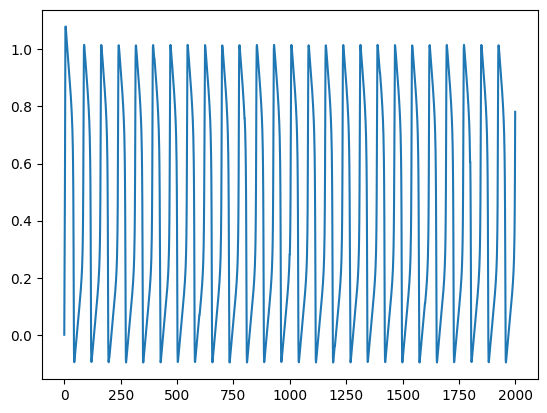

In [4]:
def getConstraintFromData(w_i=1, data_folder="./treino2/"):
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    U= np.empty(0)
    
    V = np.empty(0)
    u,v=0,0
    deltaT = 0.01
    rate = 25
    t_max=50
    iap=0.09
    for i in range (10000):
                begin=0
                sol=generateExactSolution(t_max,deltaT,u,v,rate,iap,0,t_max)

                T=np.append(T,sol.T[2] - begin)
                K = np.append(K,np.full_like (sol.T[2],iap))
                U = np.append(U,np.full_like (sol.T[2],u))
 
                V= np.append(V,np.full_like(sol.T[2],v))

                SOLs=np.append(SOLs,sol.T[0])
                SOLw=np.append(SOLw,sol.T[1])
                u,v=SOLs[-1],SOLw[-1]
     

    print(np.shape(SOLs))
    plt.plot(SOLs[0:2000])
    plt.show()
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)

    
getConstraintFromData()

overweriting
[ 0.          0.26067408  0.66835795 ... -0.03414004 -0.01377623
  0.00670369]


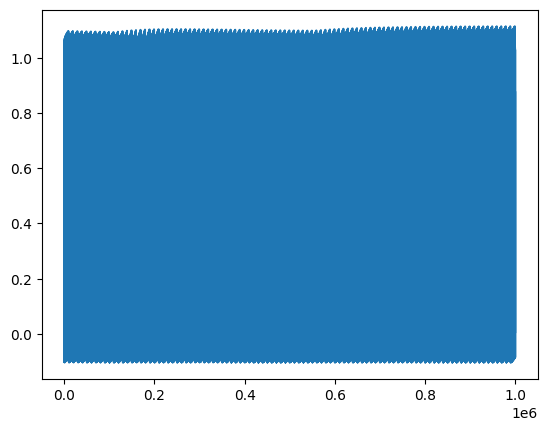

(1000, 1000)


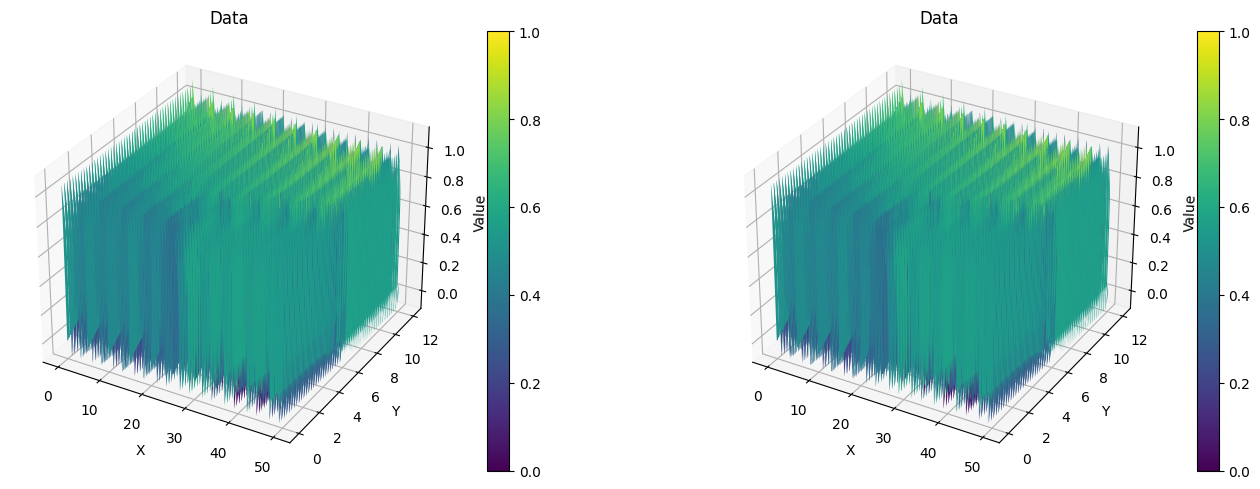

In [5]:
def getConstraintFromData(w_i=1, data_folder="./treino1/"):
    t_w=50
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    V = np.empty(0)
    U = np.empty(0)
    krange = [(0.08 + 0.03 * i * 0.1) for i in range(0, 10)]
    vrange = [(0.00 + 0.1 * i * 0.12) for i in range(0, 10)]
    urange = [(0.00 + 0.01 * i * 1) for i in range(0, 100)]


    deltaT = 0.01
    rate = 50
    i=0
    for UR in urange:
        for KR in krange:
            for VR in vrange:
                sol = generateExactSolution(t_w, deltaT, UR, VR, rate, KR, 0, t_w)

                T = np.append(T, sol.T[2] - 0)
                K = np.append(K, np.full_like(sol.T[2], KR))
                U = np.append(U, np.full_like(sol.T[2], UR))
                V = np.append(V, np.full_like(sol.T[2], VR))
                SOLs = np.append(SOLs, sol.T[0])
                SOLw = np.append(SOLw, sol.T[1])
                i=i+1

    print(SOLs)
    plt.plot(SOLs)
    plt.show()
    nc=10*10*10
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)
    pred_u= np.reshape(SOLs, (nc,len(V)//nc))
    true_u= np.reshape(SOLs, (nc,len(V)//nc))
    plota(pred_u,T)
    
getConstraintFromData()


overweriting


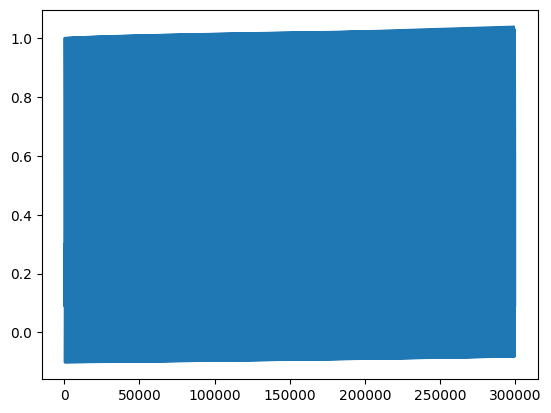

(300, 1000)


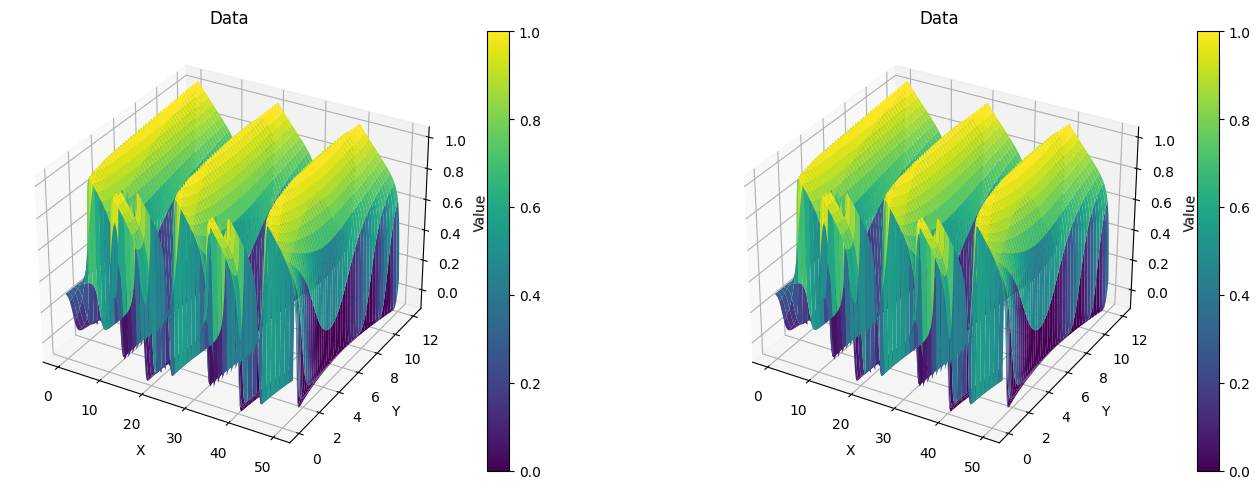

In [7]:
def getConstraintFromData(w_i=1, data_folder="./treino3/"):
    t_w=50
    try:
        os.mkdir(data_folder)
    except:
        print("overweriting")
    T = np.empty(0)
    K = np.empty(0)
    SOLs = np.empty(0)
    SOLw = np.empty(0)
    V = np.empty(0)
    U = np.empty(0)

    krange = [(0.08 + (1/30)*0.03 * i * 0.1) for i in range(0, 3*100)]
    vrange = [(0.00 + 0.1 * i * 0.12) for i in range(5, 6)]
    urange = [(0.00 + 0.1 * i * 1) for i in range(3, 4)]
    deltaT = 0.01
    rate =5
    
    for UR in urange:
        for KR in krange:
            for VR in vrange:
                sol = generateExactSolution(t_w, deltaT, UR, VR, rate, KR, 0, t_w)

                T = np.append(T, sol.T[2] - 0)
                K = np.append(K, np.full_like(sol.T[2], KR))
                U = np.append(U, np.full_like(sol.T[2], UR))
                V = np.append(V, np.full_like(sol.T[2], VR))
                SOLs = np.append(SOLs, sol.T[0])
                SOLw = np.append(SOLw, sol.T[1])

    #print(SOLs)
    plt.plot(SOLs)
    plt.show()
    # Save data arrays to CSV files
    np.save(data_folder + "T.npy", T)
    np.save(data_folder + "K.npy", K)
    np.save(data_folder + "U.npy", U)
    np.save(data_folder + "V.npy", V)
    np.save(data_folder + "SOLs.npy", SOLs)
    np.save(data_folder + "SOLw.npy", SOLw)
    nc=np.shape(krange)[0]*np.shape(vrange)[0]*np.shape(urange)[0]
    pred_u= np.reshape(SOLs, (nc,len(V)//nc))
    true_u= np.reshape(SOLs, (nc,len(V)//nc))
    plota(pred_u,T)
    
getConstraintFromData()